In [3]:
import numpy as np
import pandas as pd 
from sklearn.datasets import make_classification, make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

%matplotlib inline

C:\Users\kajib\Anaconda3\patkajos812\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\kajib\Anaconda3\patkajos812\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\kajib\Anaconda3\patkajos812\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\kajib\Anaconda3\patkajos812\lib\site-packages\tensorflow\pyth

In [4]:
df = pd.read_table('./df_cl',sep =',',low_memory=False)

In [5]:
df 

,STATE_CODE_001,STRUCTURE_NUMBER_008,RECORD_TYPE_005A,ROUTE_PREFIX_005B,SERVICE_LEVEL_005C,ROUTE_NUMBER_005D,DIRECTION_005E,HIGHWAY_DISTRICT_002,COUNTY_CODE_003,PLACE_CODE_004,...,FED_AGENCY,DATE_LAST_UPDATE,TYPE_LAST_UPDATE,DEDUCT_CODE,STATUS_WITH_10YR_RULE,SUFFICIENCY_RATING,STATUS_NO_10YR_RULE,CAT10,CAT23,CAT29
0,1,00000000000S702,1,6.0,1.0,04007,0.0,09,53.0,0.0,...,Y,5/9/2019,B,Z,0,100.0,0,G,7,145.50
1,1,00000000000S703,1,6.0,1.0,04003,0.0,09,53.0,3004.0,...,Y,5/9/2019,B,Z,0,100.0,0,G,7,133.28
2,1,0000000000M0022,1,8.0,1.0,00000,0.0,00,113.0,19000.0,...,Y,5/6/2019,B,Z,0,69.5,0,F,5,387.00
3,1,000001014002450,1,3.0,1.0,00101,0.0,02,79.0,0.0,...,Y,5/6/2019,B,C,2,45.9,2,F,5,15453.36
4,1,000001331700710,1,6.0,2.0,00000,0.0,02,33.0,0.0,...,Y,5/6/2019,B,A,2,61.3,2,F,5,12552.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280369,72,030071,1,5.0,1.0,00000,0.0,01,61.0,0.0,...,N,4/9/2019,B,Z,0,93.9,0,G,7,799.20
280370,72,030101,1,5.0,1.0,00000,0.0,03,3.0,31963.0,...,N,4/9/2019,B,Z,0,91.0,0,G,8,344.25
280371,72,030261,1,3.0,1.0,00368,0.0,05,153.0,81069.0,...,N,4/9/2019,B,Z,0,96.9,0,G,8,1009.12
280372,72,030271,1,5.0,0.0,00000,0.0,06,45.0,23879.0,...,N,4/9/2019,B,Z,0,71.9,2,G,8,89.55


In [6]:
df['STATE_CODE_001'].value_counts().count()

53

In [7]:
states = { 2: 'Alaska', 1: 'Alabama', 5: 'Arkansas', 4:'Arizona', 6:'California', 8:'Colorado',
           9: 'Connecticut', 11: 'District of Columbia', 10: 'Delaware', 12: 'Florida', 13:'Georgia',
           15: 'Hawaii', 19: 'Iowa', 16: 'Idaho', 17: 'Illinois', 18: 'Indiana', 20: 'Kansas', 21:'Kentucky',
           22: 'Louisiana', 25: 'Massachusetts', 24: 'Maryland', 23: 'Maine', 26: 'Michigan',
           27: 'Minnesota', 29: 'Missouri', 28: 'Mississippi', 30: 'Montana', 37: 'North Carolina',
           38: 'North Dakota', 31: 'Nebraska', 32:'Nevada', 33: 'New Hampshire', 34: 'New Jersey', 35: 'New Mexico',
           32: 'Nevada', 36: 'New York', 39: 'Ohio', 40: 'Oklahoma', 41:'Oregon', 42: 'Pennsylvania',
           72: 'Puerto Rico' , 44:'Rhode Island' , 45: 'South Carolina', 46: 'South Dakota', 47: 'Tennessee', 48: 'Texas',
           49: 'Utah', 51: 'Virginia', 50: 'Vermont', 53: 'Washington', 55:'Wisconsin', 54: 'West Virginia',66:'Guam',
           56: 'Wyoming'}

In [8]:
df['STATE_CODE_001'].replace(states, inplace = True)
dummies = pd.get_dummies(df['STATE_CODE_001'])
dummies.head(2)

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
df_dummies = pd.concat([df, dummies.reindex(df.index)], axis=1)
df_dummies.head(2)

,STATE_CODE_001,STRUCTURE_NUMBER_008,RECORD_TYPE_005A,ROUTE_PREFIX_005B,SERVICE_LEVEL_005C,ROUTE_NUMBER_005D,DIRECTION_005E,HIGHWAY_DISTRICT_002,COUNTY_CODE_003,PLACE_CODE_004,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,Alabama,00000000000S702,1,6.0,1.0,04007,0.0,09,53.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,Alabama,00000000000S703,1,6.0,1.0,04003,0.0,09,53.0,3004.0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
X = df.drop('STRUCTURE_KIND_043A', axis = 1)
y = df['STRUCTURE_KIND_043A']

In [11]:
X= df.select_dtypes(exclude ='object')
y = to_categorical(y)

In [12]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [14]:
model = Sequential()
model.add(Dense(128, 
                input_shape=(72,),
                activation='relu'))
model.add(Dense(32, 
                activation='relu'))
model.add(Dense(10, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [15]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
history = model.fit(X_train_sc, y_train, 
                    validation_data=(X_test_sc, y_test),
                    epochs=30,  batch_size=None,
    verbose=2)

Train on 210280 samples, validate on 70094 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/30
 - 46s - loss: 0.1243 - acc: 0.9662 - val_loss: 0.0354 - val_acc: 0.9950
Epoch 2/30
 - 22s - loss: 0.0222 - acc: 0.9966 - val_loss: 0.0281 - val_acc: 0.9963
Epoch 3/30
 - 23s - loss: 0.0204 - acc: 0.9971 - val_loss: 0.0167 - val_acc: 0.9981
Epoch 4/30
 - 23s - loss: 0.0193 - acc: 0.9976 - val_loss: 0.0186 - val_acc: 0.9975
Epoch 5/30
 - 20s - loss: 0.0187 - acc: 0.9977 - val_loss: 0.0205 - val_acc: 0.9978
Epoch 6/30
 - 23s - loss: 0.0163 - acc: 0.9981 - val_loss: 0.0261 - val_acc: 0.9963
Epoch 7/30
 - 23s - loss: 0.0163 - acc: 0.9982 - val_loss: 0.0210 - val_acc: 0.9978
Epoch 8/30
 - 23s - loss: 0.0155 - acc: 0.9983 - val_loss: 0.0159 - val_acc: 0.9984
Epoch 9/30
 - 23s - loss: 0.0154 - acc: 0.9982 - val_loss: 0.0228 - val_acc: 0.9968
Epoch 10/30
 - 22s - loss: 0.0150 - acc: 0.9984 - val_loss: 0.0171 - val_acc: 0.9984
Epoch 11/30
 - 22s - loss: 0.0143 - acc: 0.9984 - val_loss: 

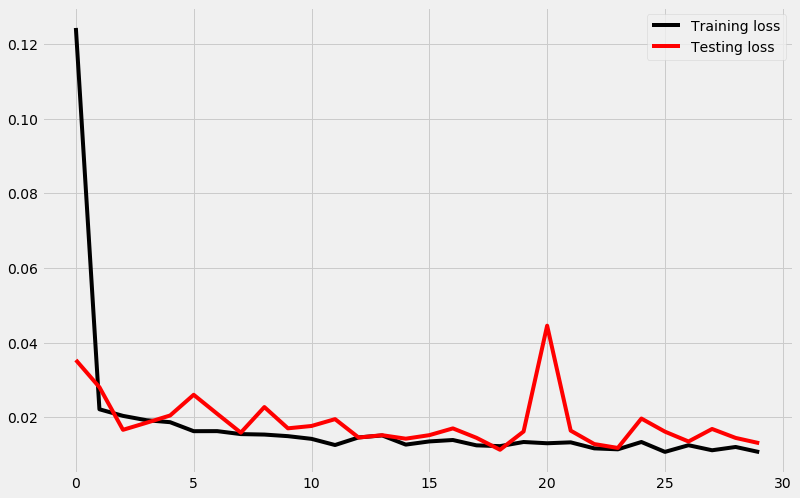

In [17]:
plt.style.use('fivethirtyeight')
train_loss = history.history['loss']
test_loss = history.history['val_loss']
plt.figure(figsize=(12, 8))
plt.plot(train_loss, label='Training loss', color='k')
plt.plot(test_loss, label='Testing loss', color='r')
plt.legend();

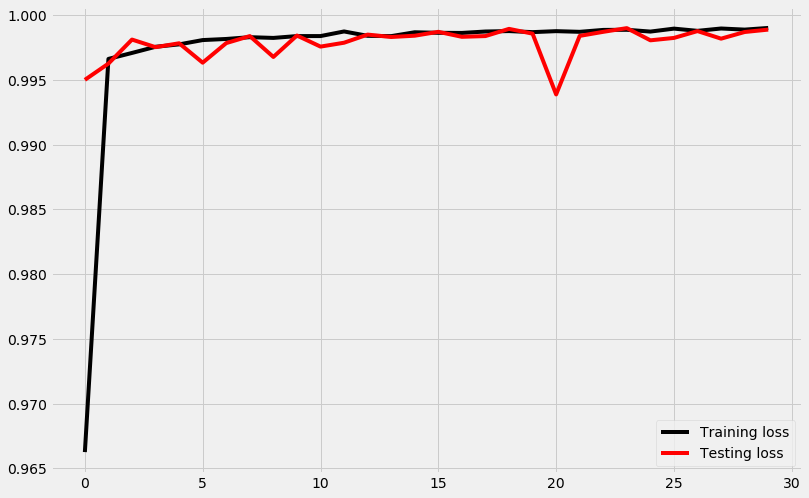

In [18]:
plt.style.use('fivethirtyeight')
train_loss = history.history['acc']
test_loss = history.history['val_acc']
plt.figure(figsize=(12, 8))
plt.plot(train_loss, label='Training loss', color='k')
plt.plot(test_loss, label='Testing loss', color='r')
plt.legend();